In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
train_df = pd.read_csv("docs/train.csv")
test_df = pd.read_csv("docs/test.csv")


In [6]:
print("Train veri şekli:", train_df.shape)
print("Test veri şekli:", test_df.shape)

train_df.head()




Train veri şekli: (2000, 21)
Test veri şekli: (1000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

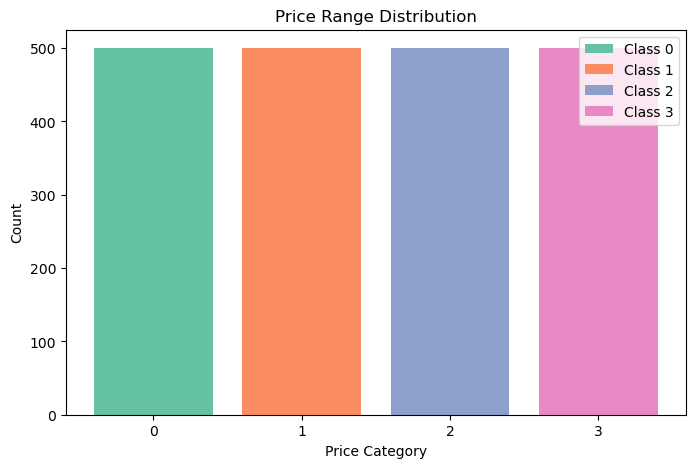

In [8]:
# price_range sınıf dağılımı



# Fiyat kategorileri
price_order = sorted(train_df['price_range'].unique())
counts = train_df['price_range'].value_counts().sort_index()

# Renk paleti: Set2'den 4 farklı renk 
colors = sns.color_palette("Set2", n_colors=4)

# Her barı tek tek çiziyoruz
plt.figure(figsize=(8, 5))
for i, val in enumerate(price_order):
    plt.bar(val, counts[val], color=colors[i], label=f'Class {val}')

plt.title("Price Range Distribution")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.xticks(price_order)
plt.legend()
plt.show()





In [9]:
# Sayısal değişkenleri listele (price_range hariç)
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols.remove("price_range")  # hedef değişkeni çıkar


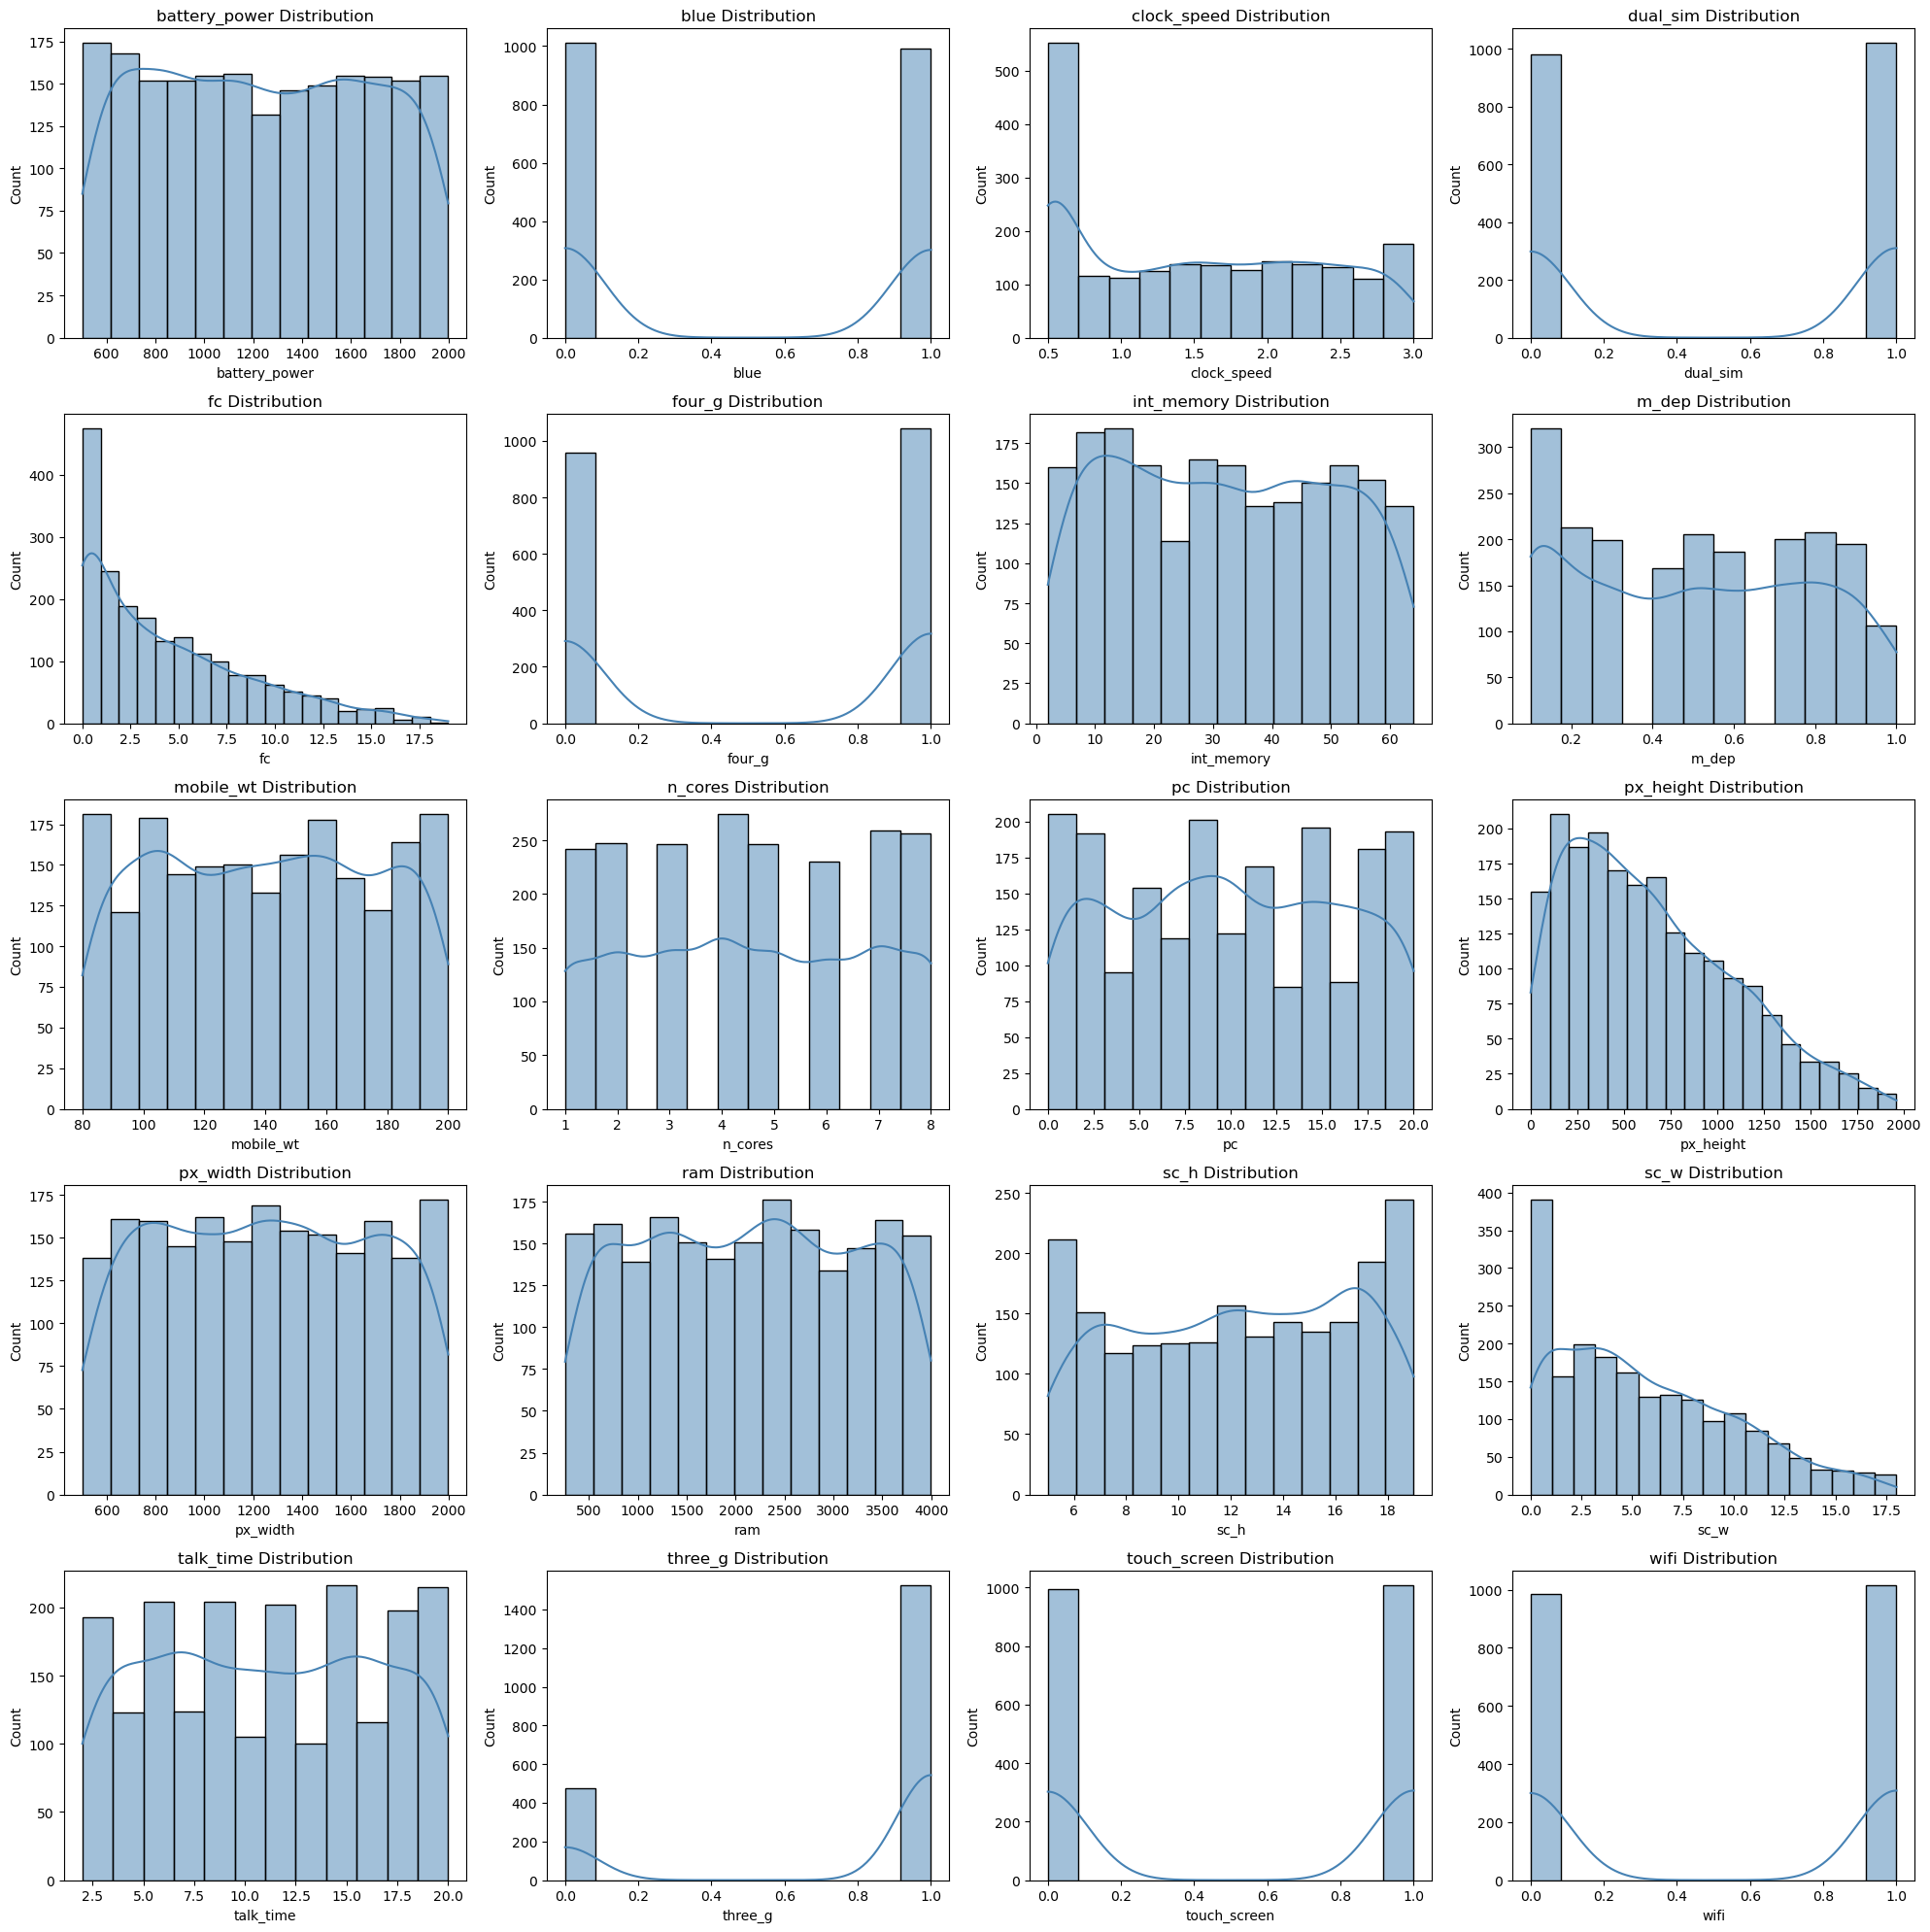

In [14]:
# Tüm sayısal kolonların histogramlarını çiz
plt.figure(figsize=(20, 20))
for i,col in enumerate(numeric_cols):
    plt.subplot(5,4,i+1)
    sns.histplot(train_df[col],kde=True,color='steelblue')
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

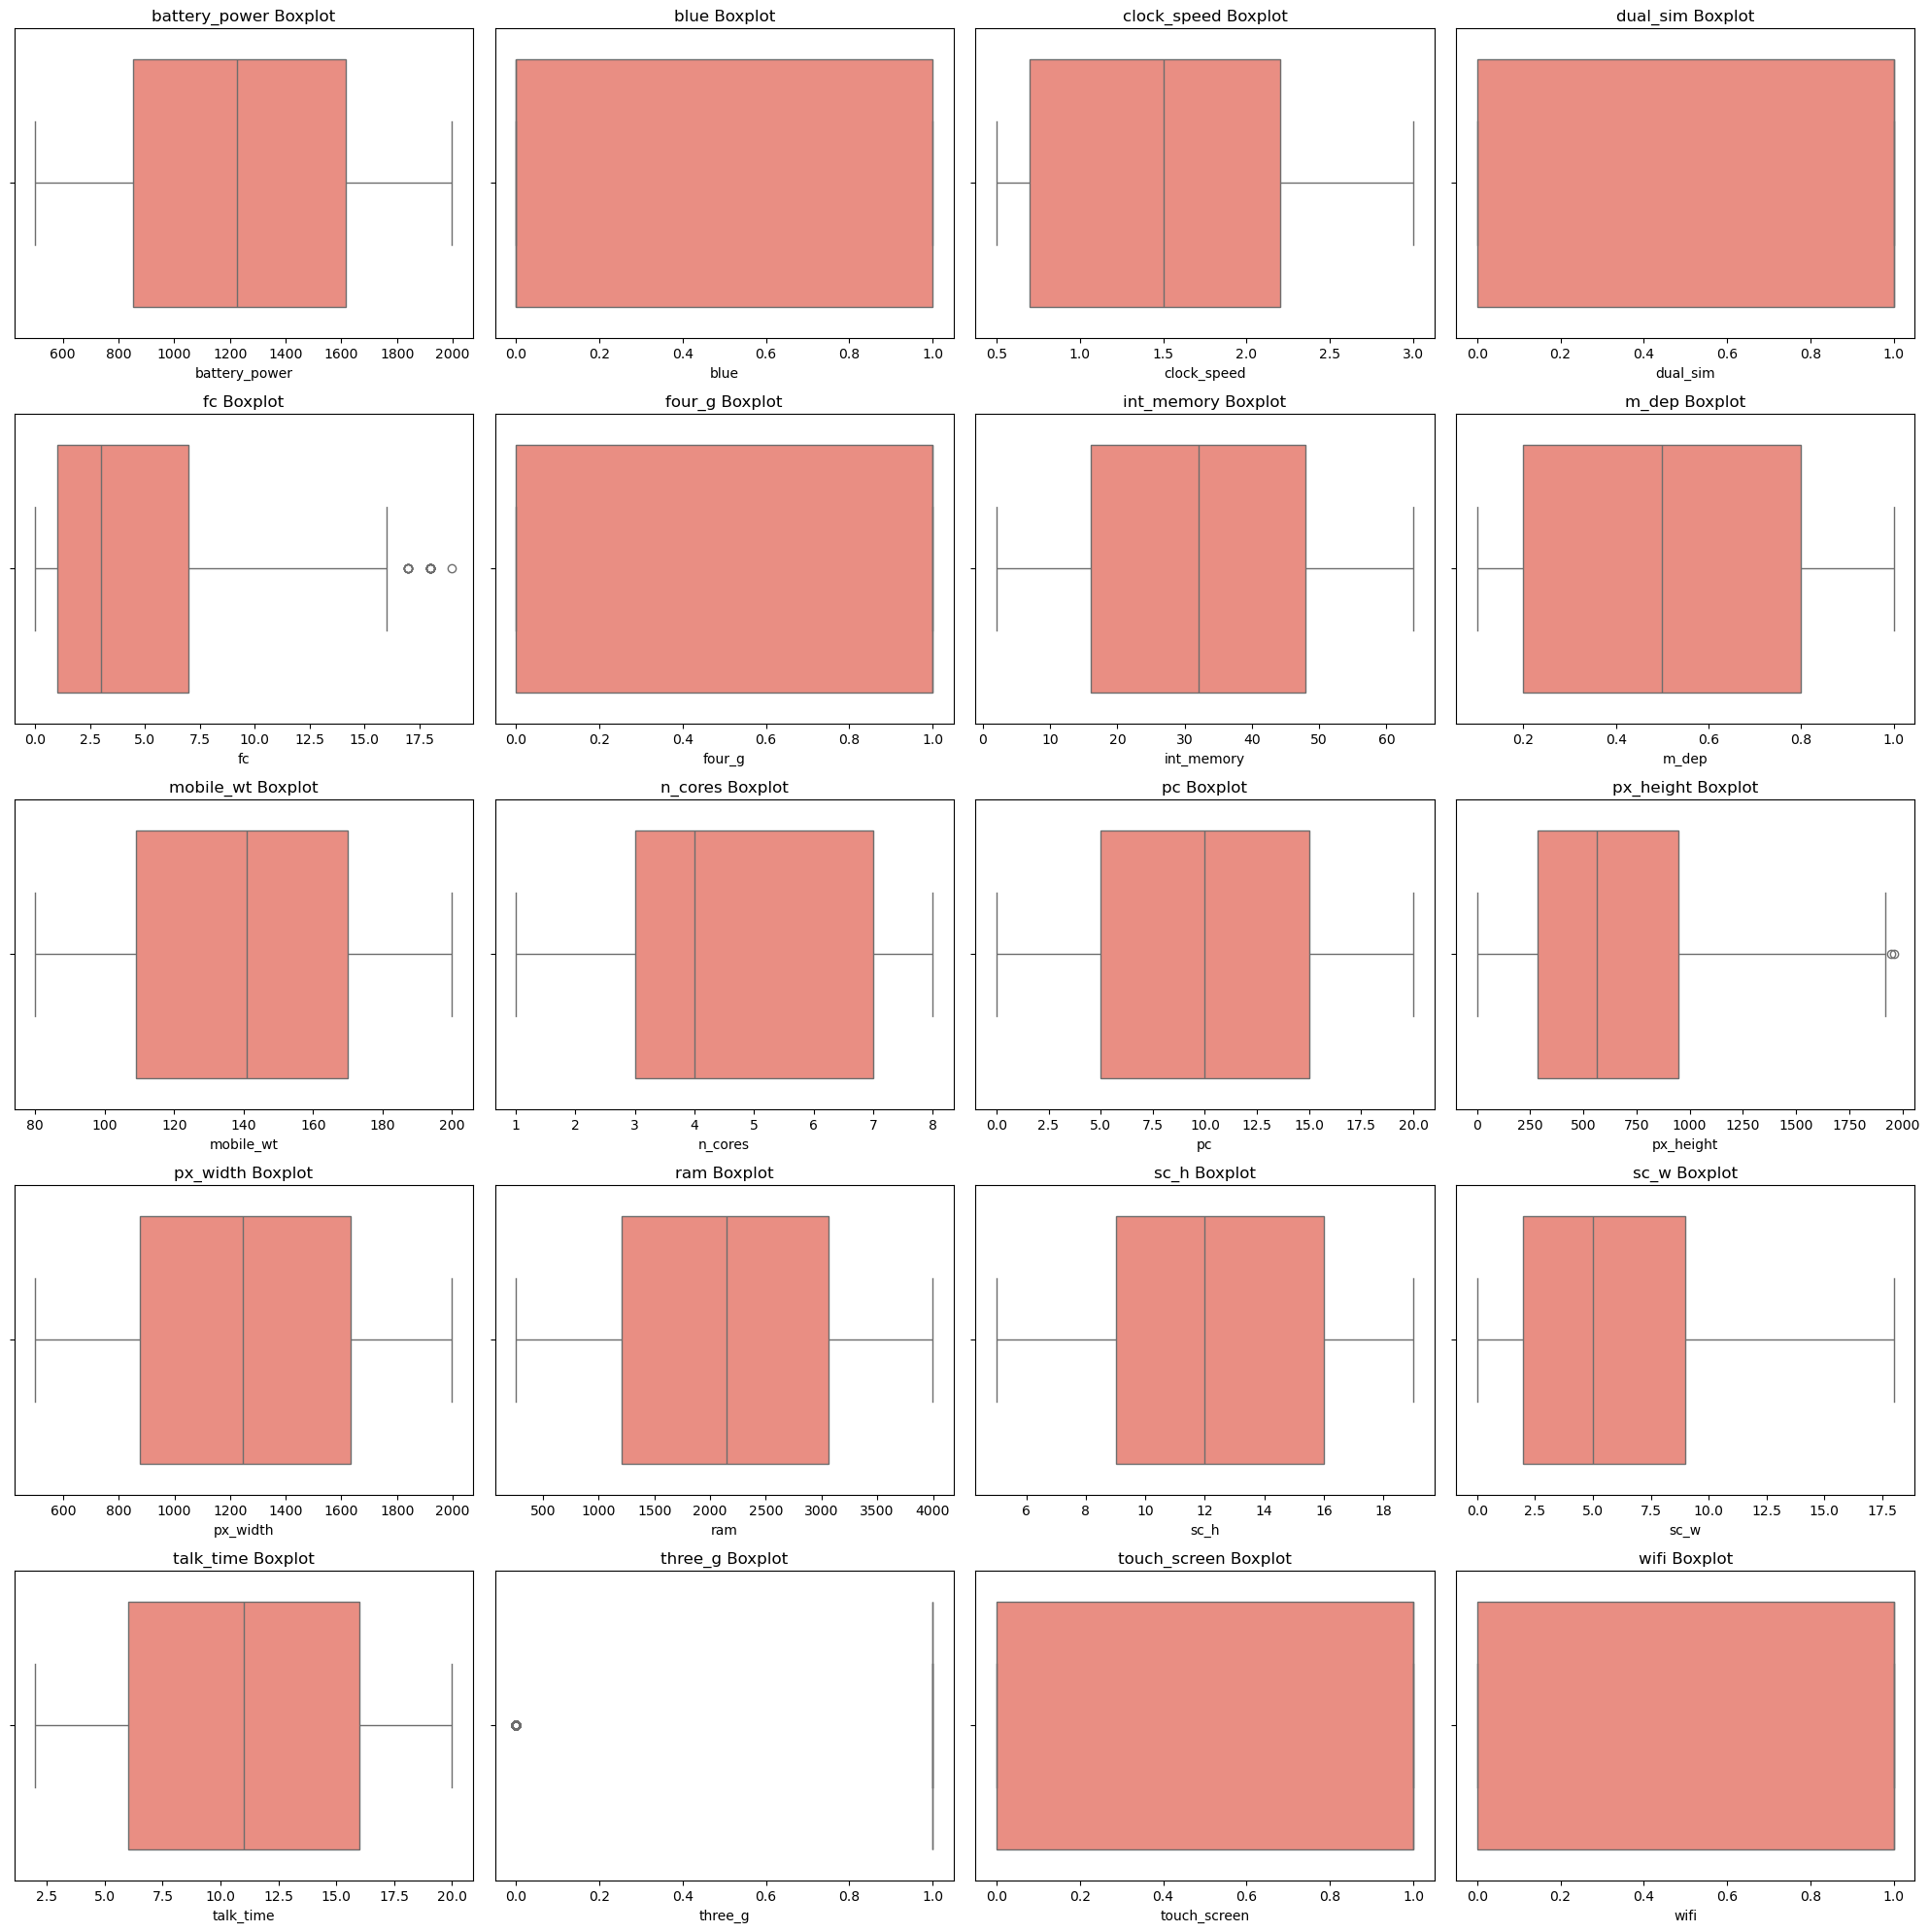

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=train_df[col], color='salmon')
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()


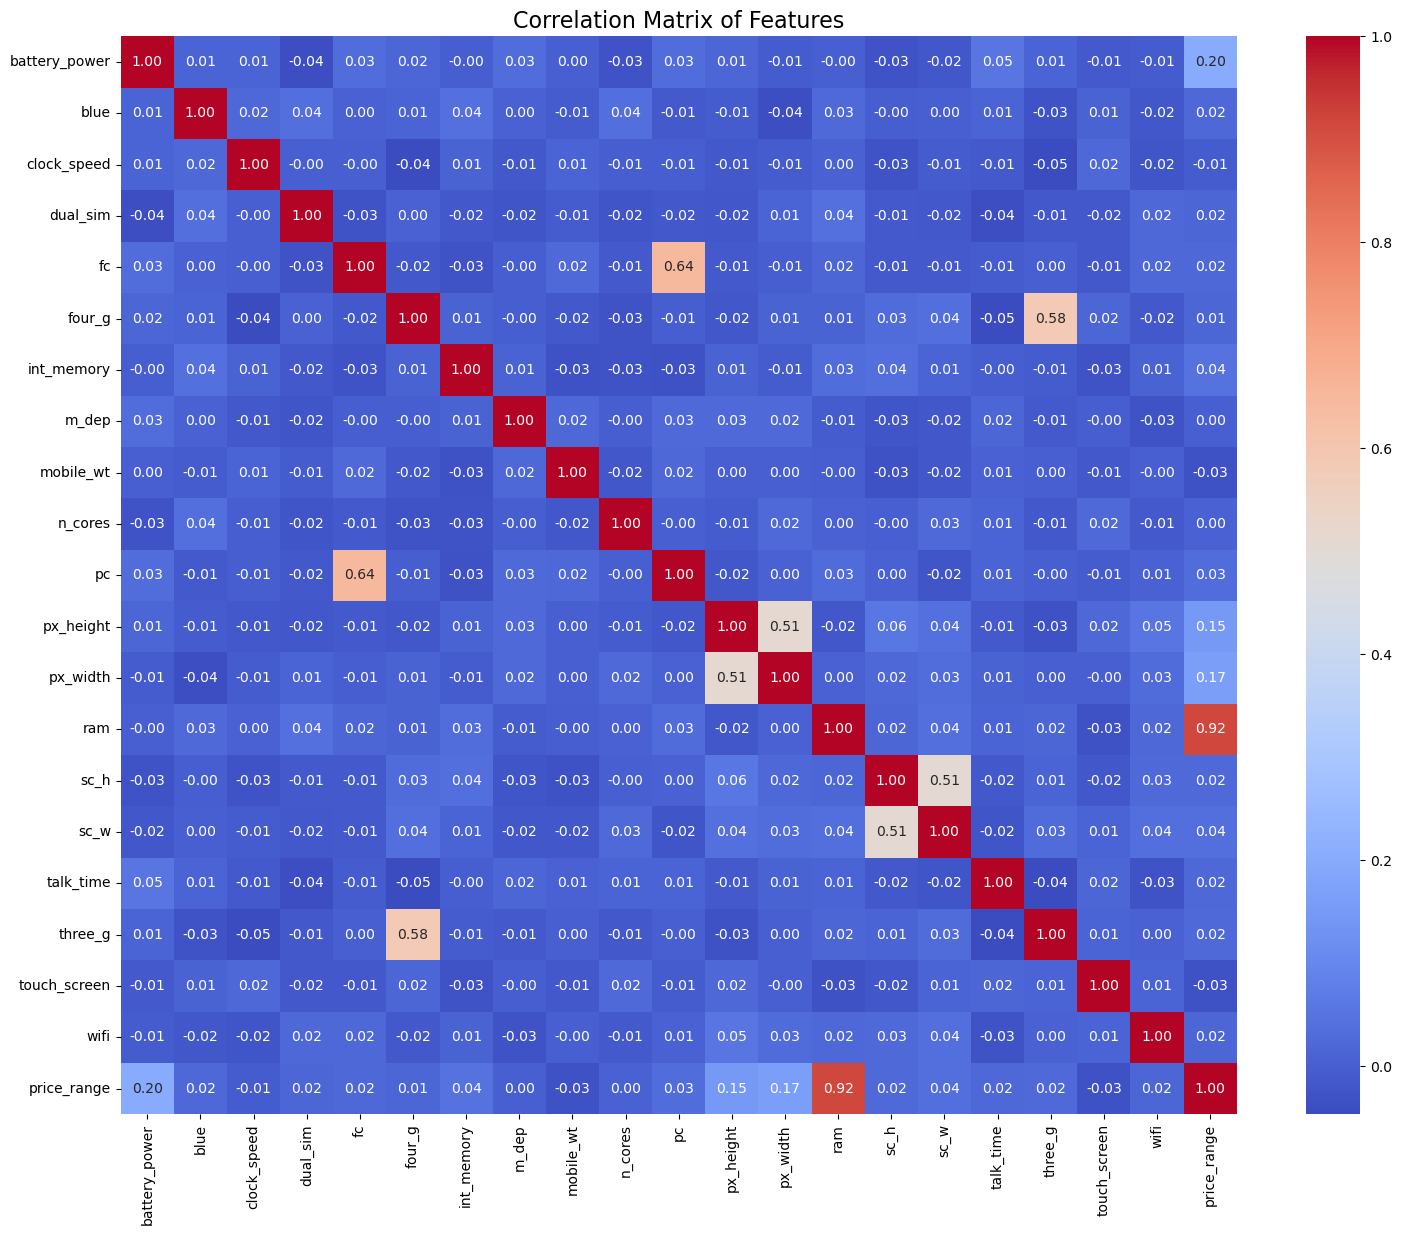

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korelasyon matrisini hesapla
correlation_matrix = train_df.corr()

# Isı haritasını çiz
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()


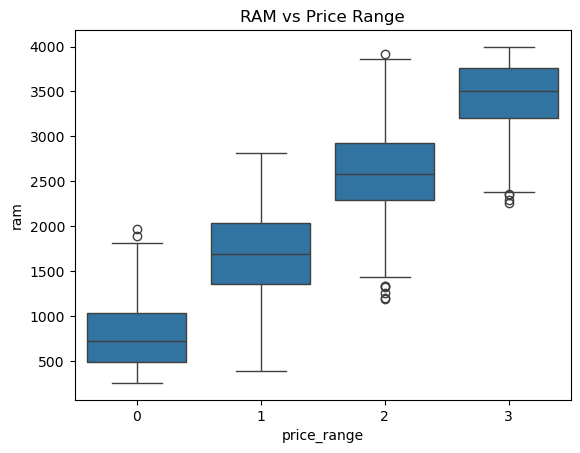

In [22]:
sns.boxplot(x='price_range', y='ram', data=train_df)
plt.title("RAM vs Price Range")
plt.show()


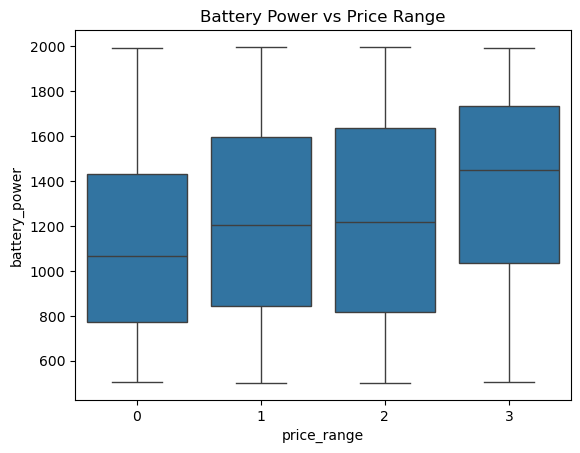

In [24]:
sns.boxplot(x='price_range', y='battery_power', data=train_df)
plt.title("Battery Power vs Price Range")
plt.show()


In [40]:

# price_range ile olan korelasyonları sırala
correlations = train_df.corr()["price_range"].drop("price_range").sort_values(ascending=False)
print(correlations)



ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [42]:
X = train_df.drop("price_range", axis=1)
y = train_df["price_range"]


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [67]:
import numpy as np

X_train["screen_area"] = X_train["screen_area"].replace(0, np.nan)
X_val["screen_area"] = X_val["screen_area"].replace(0, np.nan)

X_train["ppi"] = X_train["ppi"].fillna(X_train["ppi"].median())
X_val["ppi"] = X_val["ppi"].fillna(X_val["ppi"].median())

# Kamera toplam çözünürlük
X_train["camera_total"] = X_train["fc"] + X_train["pc"]
X_val["camera_total"] = X_val["fc"] + X_val["pc"]

# Batarya gücü başına ağırlık
X_train["battery_per_weight"] = X_train["battery_power"] / X_train["mobile_wt"]
X_val["battery_per_weight"] = X_val["battery_power"] / X_val["mobile_wt"]


 doğruluk: 0.8975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.86      0.85      0.85       100
           2       0.84      0.81      0.82       100
           3       0.92      0.96      0.94       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



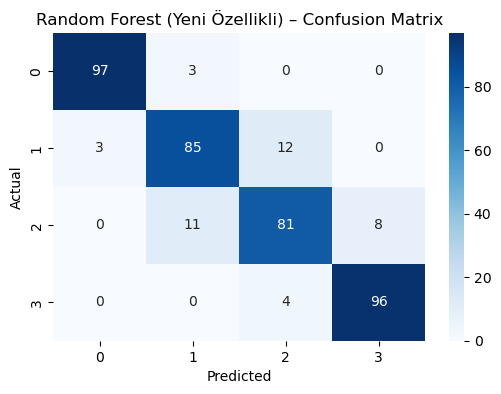

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model oluştur
rf_model_fe = RandomForestClassifier(random_state=42)
rf_model_fe.fit(X_train, y_train)

# Tahmin yap
y_pred_fe = rf_model_fe.predict(X_val)

# Başarı oranı
print(" doğruluk:", accuracy_score(y_val, y_pred_fe))

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_pred_fe))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_fe), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest (Yeni Özellikli) – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [88]:
# test verisine yeni özellikleri ekleme
test_df["screen_area"] = test_df["sc_h"] * test_df["sc_w"]
test_df["screen_area"] = test_df["screen_area"].replace(0, np.nan)

test_df["ppi"] = np.sqrt(test_df["px_height"]**2 + test_df["px_width"]**2) / test_df["screen_area"]
test_df["ppi"] = test_df["ppi"].fillna(test_df["ppi"].median())

test_df["camera_total"] = test_df["fc"] + test_df["pc"]
test_df["battery_per_weight"] = test_df["battery_power"] / test_df["mobile_wt"]

# Test giriş verisini yeniden tanımla
X_test = test_df.drop("id", axis=1)

# Özellik uyumu kontrolü – X_train ile aynı sırada olmalı
X_test = X_test[X_train.columns]



In [90]:
# Random Forest modelinden tahmin al
test_predictions = rf_model_fe.predict(X_test)



In [92]:
# Tahminleri id ile eşleştir
submission = pd.DataFrame({
    "id": test_df["id"],
    "price_range": test_predictions
})

# CSV olarak kaydet
submission.to_csv("submission.csv", index=False)
print("submission.csv başarıyla oluşturuldu!")


submission.csv başarıyla oluşturuldu!
